# manu.sexy

## Can a Neural Network Recognize too Sexy Images?

 <table align="middle">
 <tr>
    <td> <img src="20110326_2018.JPG" alt="2011" style="width: 150px" align="middle"/> </td>
     <td> & </td>
    <td> <img src="20180808_1952.JPG" alt="2019" style="width: 150px" align="middle"/> </td>
 </tr>
 </table>

This is a good friend of mine called Manu. Manu is crazy about tracking himself. Since 8 years he had been taking photos of himself each and every day. Which leads to an incredible dataset of more than 3000 images. A really nice dataset to analyze when you want to try out Image Classification with TensorFlow 2 :) 

Let me explain you how I did data preprocessing, model training and evaluation

### Load Python modules

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2 # module for image pre-processing. Many of these function come right away in tf too 
import os

### Load one image

* open one RGB image from directoy 
* the image's dimensions are 3088 by 2316 by 3 (3 because of 3 color channels)
* each value in the array represents the darkness of this specific pixel 

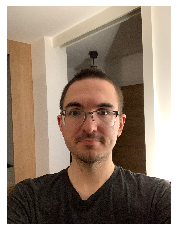

[[[157 176 191]
  [166 185 200]
  [165 184 199]
  ...
  [187 207 224]
  [187 207 224]
  [187 207 224]]

 [[159 178 193]
  [166 185 200]
  [165 184 199]
  ...
  [187 207 224]
  [187 207 224]
  [187 207 224]]

 [[156 175 190]
  [160 179 194]
  [159 178 193]
  ...
  [186 206 223]
  [186 206 223]
  [186 206 223]]

 ...

 [[ 47  55  62]
  [ 43  51  58]
  [ 38  46  53]
  ...
  [ 13  17  22]
  [ 15  19  24]
  [ 18  22  27]]

 [[ 42  49  58]
  [ 44  51  60]
  [ 34  41  50]
  ...
  [ 13  17  22]
  [ 16  20  25]
  [ 18  22  27]]

 [[ 39  46  55]
  [ 39  46  55]
  [ 31  38  47]
  ...
  [ 12  16  21]
  [ 19  23  28]
  [ 20  24  29]]]
(3088, 2316, 3)


In [13]:
DIRPATH = ('your path to an example image')

img_array = cv2.imread(DIRPATH)
plt.axis("off")
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)) 
plt.show()

print(img_array) # see the picture as 3-dimensional array
print(img_array.shape) # see the shape of the image

In [4]:
img_array.shape

(1280, 960, 3)

In [5]:
len(img_array)

1280

### Resize one image

define heigth and width that you want to have after resizing

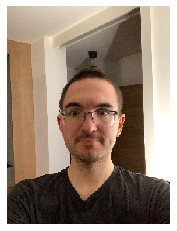

In [17]:
IMG_HEIGHT = 374
IMG_WIDTH = 280

new_sized_img = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
img_array = cv2.imread(DIRPATH)
plt.axis("off")
plt.imshow(cv2.cvtColor(new_sized_img, cv2.COLOR_BGR2RGB)) 
plt.show()

### Load dataset for training a neural network

define a function to resize all images during data loading

In [19]:
IMG_HEIGHT = 374
IMG_WIDTH = 280
       
def load_img(path, lis, label):
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
            lis.append([img_resized, label])
        except Exception as e:
            pass

Before training any supervised ML model, I had to label the images
For labelling I selected images that showed Manu with shirt without wearing one. 
Then I put all images with t-shirt in one folder and all without in another one.

In total I loaded 1012 images

In [20]:
PATH_wos = ('path to folder that contains images without a shirt')
PATH_ws = ('path to folder that contains images without a shirt')

wos = []
ws = []

load_img(PATH_wos, wos, 1)
load_img(PATH_ws, ws, 0)

full_data = wos + ws
print(len(full_data))

1024


721 images Manu with shirt,
303 images Manu without a shirt

In [21]:
print(len(wos))
print(len(ws))

303
721


### Shuffle images for a random sample

After loading and merging the data we have all images in one huge Python list. In oder to define a balanced train and test set which is needed for the modelling part, we should sampling the data.

In [22]:
full_data = np.array(full_data)
np.random.shuffle(full_data)
print(full_data.shape)

(1024, 2)


Divide data into a training (700 images) and test set (324 images)

In [24]:
training = full_data[:700]
test = full_data[701:]

### Data Pre-processing 

#### training dataset

bring features and labels into the correct data structure

In [32]:
train_features = []
for img in range(len(training)):
    train_features.append(training[img][0])

train_labels = []
for label in range(len(training)):
    train_labels.append(training[label][1])

print(len(train_features))
print(len(train_labels))

# take a look on the shape of first image's features in the list of 700 in total
print('features: ' + str(train_features[0].shape))
# take a look the shape of the first image's labels
print('label: ' + str(train_labels[0]))

700
700
features: (374, 280, 3)
label: 1


#### test dataset

bring features and labels into the correct data structure

In [55]:
test_features = []
for img in range(len(test)):
    test_features.append(test[img][0])

test_labels = []
for label in range(len(test)):
    test_labels.append(test[label][1])

print(len(test_features))
print(len(test_labels))

323
323


In [35]:
train_features[0].shape

(374, 280, 3)

In [36]:
len(train_labels)

700

In [101]:
train_features[0]

array([[[118, 110, 120],
        [122, 115, 125],
        [116, 114, 120],
        ...,
        [148, 136, 132],
        [136, 127, 118],
        [133, 128, 119]],

       [[119, 114, 123],
        [110, 108, 117],
        [113, 113, 119],
        ...,
        [132, 122, 118],
        [138, 129, 120],
        [139, 130, 121]],

       [[ 96,  95, 104],
        [123, 125, 133],
        [109, 112, 117],
        ...,
        [135, 123, 117],
        [134, 122, 114],
        [141, 130, 122]],

       ...,

       [[183, 159, 139],
        [178, 154, 134],
        [177, 153, 133],
        ...,
        [223, 193, 158],
        [208, 177, 144],
        [215, 185, 151]],

       [[187, 163, 146],
        [184, 160, 142],
        [194, 170, 152],
        ...,
        [197, 167, 132],
        [218, 187, 154],
        [213, 182, 149]],

       [[189, 167, 149],
        [181, 159, 141],
        [180, 160, 142],
        ...,
        [210, 180, 145],
        [200, 169, 136],
        [210, 180, 147]]

## Train a neural network

convert input data into numpy arrays

In [56]:
train_features = np.array(train_features)
train_labels = np.array(train_labels)

test_features = np.array(test_features)
test_labels = np.array(test_labels)

# required data structure for features and labels
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(700, 374, 280, 3)
(700,)
(323, 374, 280, 3)
(323,)


## Create a neural network

use the sequential model API by Keras
* define shape of images at the input layer
* first hidden layer has 120 nodes (neurons)
* second hidden layer has 64 nodes (neurons)
* output layer has 2 neurons as we are facing a binary classification problem

In [67]:
model_dense = keras.Sequential([
    keras.layers.Flatten(input_shape=(374,280,3)),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(2, activation='softmax')
])

model_dense.compile(optimizer='adam',
                    lr=0.1, # learning rate
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

the summary shows that we are going to train on > 37 mio. weights

In [39]:
model_dense.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 314160)            0         
_________________________________________________________________
dense (Dense)                (None, 120)               37699320  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                7744      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 37,707,194
Trainable params: 37,707,194
Non-trainable params: 0
_________________________________________________________________


start model training

In [68]:
img_model_v1 = model_dense.fit(train_features, 
                            train_labels, 
                            epochs=5,
                            batch_size = 64,
                            validation_data = (test_features, test_labels))

Train on 700 samples, validate on 323 samples
Epoch 1/5
700/700 [==============================] - 5s 7ms/sample - loss: 7902.8531 - accuracy: 0.6829 - val_loss: 2808.7028 - val_accuracy: 0.8019
Epoch 2/5
700/700 [==============================] - 3s 4ms/sample - loss: 1889.1734 - accuracy: 0.8429 - val_loss: 539.2201 - val_accuracy: 0.9102
Epoch 3/5
700/700 [==============================] - 3s 4ms/sample - loss: 1083.3884 - accuracy: 0.8714 - val_loss: 1115.9998 - val_accuracy: 0.8978
Epoch 4/5
700/700 [==============================] - 3s 4ms/sample - loss: 525.0315 - accuracy: 0.9286 - val_loss: 510.3858 - val_accuracy: 0.9133
Epoch 5/5
700/700 [==============================] - 3s 4ms/sample - loss: 376.2729 - accuracy: 0.9357 - val_loss: 609.2303 - val_accuracy: 0.9319


In [69]:
test_loss, test_acc = model_dense.evaluate(test_features,  test_labels, verbose=2)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

323/1 - 1s - loss: 304.6152 - accuracy: 0.9319

Test loss: 609.2303417666409

Test accuracy: 0.9318885


In [70]:
# get statistics from model history

print(img_model_v1.history)

loss = img_model_v1.history['loss']
val_loss = img_model_v1.history['val_loss']
acc = img_model_v1.history['accuracy'] 
val_acc = img_model_v1.history['val_accuracy']
epochs = range(len(acc))

{'loss': [7902.853078962054, 1889.1733565848215, 1083.3884375, 525.0315199497768, 376.27285435267856], 'accuracy': [0.68285716, 0.8428571, 0.87142855, 0.9285714, 0.9357143], 'val_loss': [2808.7028105650156, 539.2200984423374, 1115.9998488293343, 510.3858495186726, 609.2303417666409], 'val_accuracy': [0.8018576, 0.9102167, 0.8978328, 0.9133127, 0.9318885]}


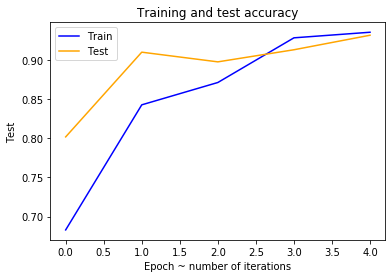

In [71]:
# plot accuracy vs epoch
plt.title('Training and test accuracy')
plt.plot(epochs, acc, color = 'blue', label = 'Train')
plt.plot(epochs, val_acc, color = 'orange', label = 'Test')
plt.xlabel('Epoch ~ number of iterations')
plt.ylabel('Test')
plt.legend()

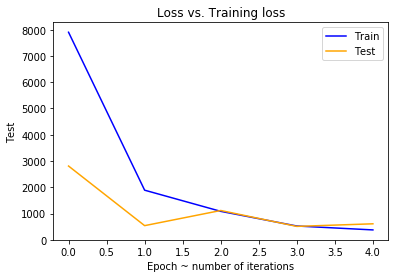

In [72]:
# plot accuracy vs epoch
plt.title('Loss vs. Training loss')
plt.plot(epochs, loss, color = 'blue', label = 'Train')
plt.plot(epochs, val_loss, color = 'orange', label = 'Test')
plt.xlabel('Epoch ~ number of iterations')
plt.ylabel('Test')
plt.legend()

In [73]:
predictions = model_dense.predict(test_features)

result_list = []
for n in range(len(predictions)):
    r = np.argmax(predictions[n])
    result_list.append(r)
    
print(result_list)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1]


In [74]:
for n in range(9):
    print('Prediction result: ' + str(np.argmax(predictions[n])))
    print('Actual value: ' + str(test_labels[n]))

Prediction result: 0
Actual value: 0
Prediction result: 0
Actual value: 0
Prediction result: 0
Actual value: 0
Prediction result: 1
Actual value: 1
Prediction result: 0
Actual value: 0
Prediction result: 0
Actual value: 0
Prediction result: 0
Actual value: 0
Prediction result: 1
Actual value: 1
Prediction result: 0
Actual value: 0


## Confusion Matrix

* True positive = predicted as 1 and actual values are 1
* True negative = predicted as 0 and actual values are 0
* False positive = predicted as 1 but actual values are 0
* False negative = predicted as 0 but actual values are 1

In [75]:
tp = []
tn = []
fp = []
fn = []

for n in range(len(test_labels)):
    if np.argmax(predictions[n]) == test_labels[n] and np.argmax(predictions[n]) == 1:
        tp.append(test_labels[n])
    elif np.argmax(predictions[n]) == test_labels[n] and np.argmax(predictions[n]) == 0:
        tn.append(test_labels[n])
    elif np.argmax(predictions[n]) != test_labels[n] and test_labels[n] == 0:
        fp.append(test_labels[n])
    elif np.argmax(predictions[n]) != test_labels[n] and test_labels[n] == 1:
        fn.append(test_labels[n])
        
print('Correct classified as too sexy: ' + str(len(tp)))
print('Correct classified as normal: ' + str(len(tn)))
print('Classified as too sexy but it was normal: ' + str(len(fp)))
print('Classified as normal but it was too sexy: ' + str(len(fn)))

Correct classified as too sexy: 106
Correct classified as normal: 195
Classified as too sexy but it was normal: 20
Classified as normal but it was too sexy: 2


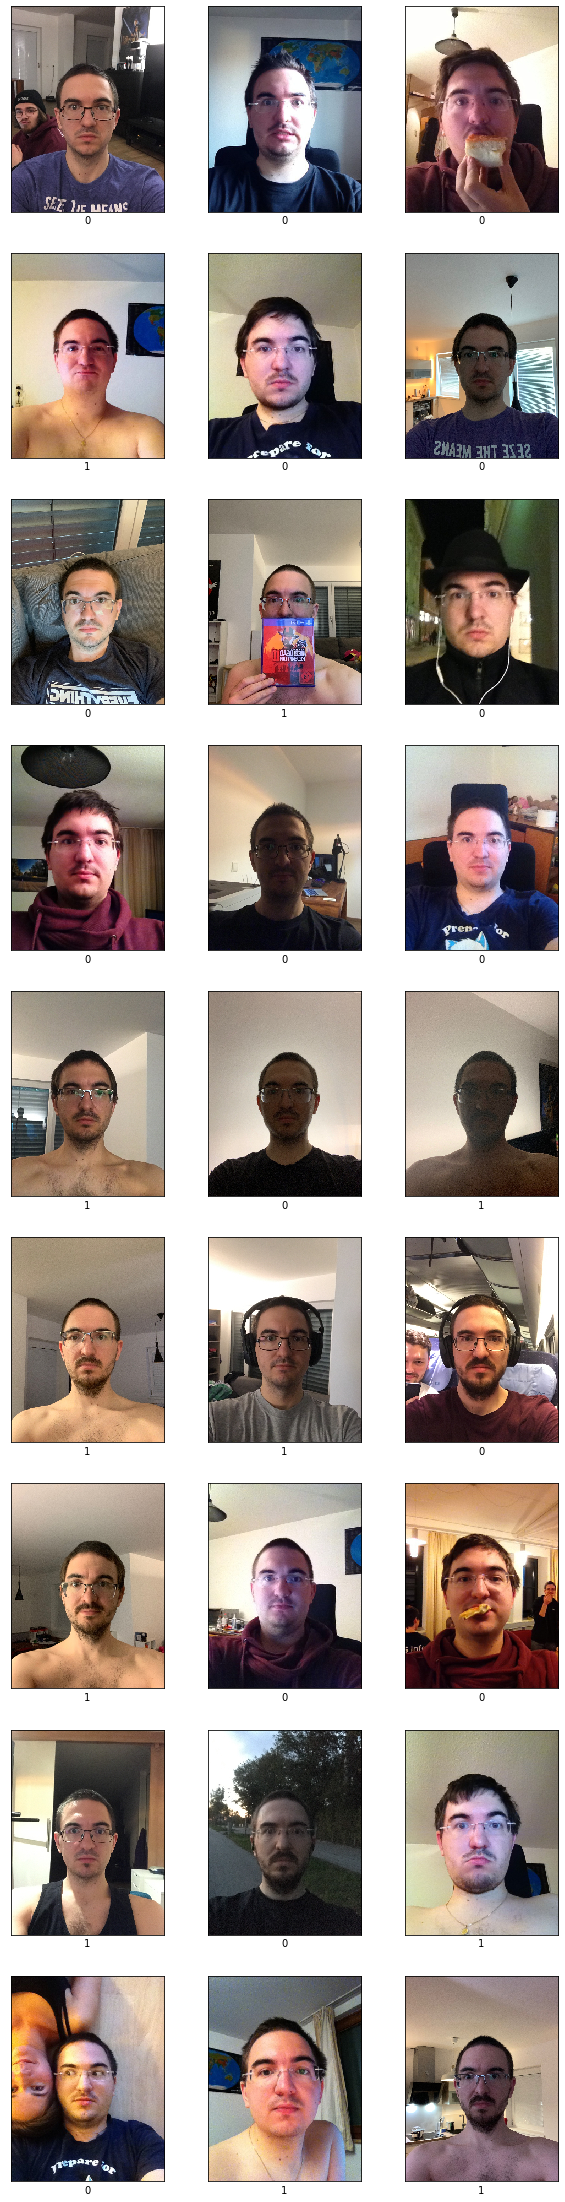

In [79]:
plt.figure(figsize=(10,40))
for n in range(27):
    plt.subplot(9,3, n+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(np.argmax(predictions[n]))
    plt.grid(False)
    plt.imshow(cv2.cvtColor(test_features[n], cv2.COLOR_BGR2RGB))
plt.show()